<a href="https://colab.research.google.com/github/l0rdyolo/AI/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read data
#plot data

In [13]:
#### read data
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_path = "/content/drive/MyDrive/Colab Notebooks/2025/kku_ai_final/data.csv"

In [9]:
df = pd.read_csv(data_path)
df.head()

,x,y
0,-5.0,-298.108727
1,-4.9,-255.602630
2,-4.8,-175.073026
3,-4.7,-230.140740
4,-4.6,-166.632522


In [11]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [12]:
print(f"X aralığı: {x.min()} - {x.max()}")
print(f"Y aralığı: {y.min()} - {y.max()}")

X aralığı: -5.0 - 4.899999999999965
Y aralığı: -298.1087266529564 - 496.8772725634706


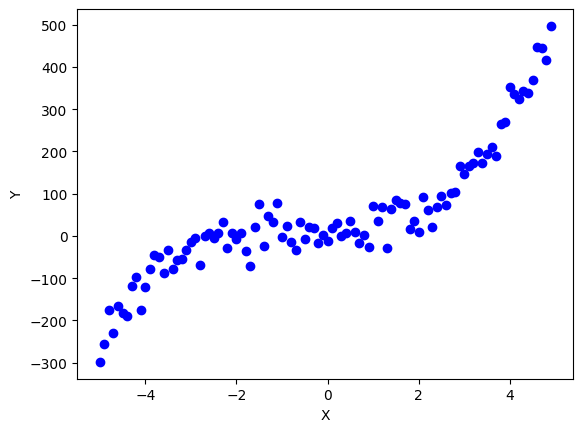

In [16]:
plt.scatter(x, y, color='blue', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()